In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
colors = ['#651FFF', '#00B0FF', '#1DE9B6', '#00E676', '#FF9100', '#FF3D00']
sns.set_palette(colors)
plt.rcParams['figure.figsize'] = (8, 8)

In [2]:
results = pd.read_csv('2014_results.csv')

results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [3]:
results = results.drop(['ctz'], axis=1)

In [4]:
results['state'] = results['state'].fillna(value='inter')

In [5]:
results.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,8,3.27,inter,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,21,5.30,inter,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,1,3.08,inter,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,27,5.37,inter,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,2,3.10,inter,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [6]:
results.loc[results['bib'].str.contains('F')].describe()

,division,age,official,genderdiv,overall,pace
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,17.479167,33.229167,157.865208,35.437500,520.500000,6.029167
std,16.856074,7.449802,12.250009,46.519685,695.156618,0.467792
min,1.000000,23.000000,138.950000,1.000000,21.000000,5.300000
25%,4.750000,28.000000,149.777500,12.750000,94.250000,5.720000
50%,13.500000,31.500000,156.940000,24.500000,225.500000,5.990000
75%,25.250000,39.250000,167.822500,41.250000,765.000000,6.405000
max,88.000000,59.000000,188.570000,306.000000,3847.000000,7.200000


In [7]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 20 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        31984 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(14)
memory usage: 4.9+ MB


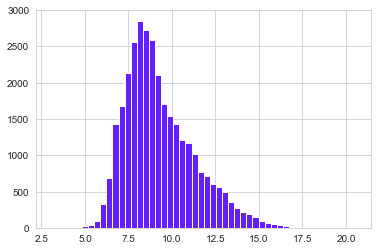

In [8]:
plt.hist(results['pace'], bins=50)
plt.show()

In [9]:
to_number = ['5k','10k','20k', '25k', 'half', '30k','35k', '40k']

def to_numeric(columns):
    for column in columns:
        results[column] = pd.to_numeric(results[column], errors='coerce')
        
to_numeric(to_number)

In [10]:
results.dtypes

10k          float64
name          object
division       int64
25k          float64
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
35k          float64
overall        int64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object

### Get the Countries
Pulled countries, their regions and their respective codes from https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv. Will merge this with the results table.

In [11]:
results.country.value_counts()

USA    27233
CAN     2175
GBR      346
ITA      212
MEX      205
GER      182
JPN      175
AUS      124
IRL      119
FRA      115
ESP       89
BRA       87
SWE       66
SUI       62
KOR       60
NED       54
HKG       53
DEN       50
CHN       42
COL       40
CHI       29
FIN       28
ISL       28
BEL       27
SIN       23
AUT       22
NOR       21
VEN       19
RSA       19
TPE       18
       ...  
PHI        4
MAS        4
TUR        4
LUX        4
UKR        3
DOM        3
HUN        3
ECU        3
PAN        3
THA        2
QAT        2
EGY        2
BAH        2
ESA        2
ROU        2
BAR        1
TRI        1
ZIM        1
CAY        1
VGB        1
EST        1
BLR        1
TAN        1
URU        1
MAR        1
LIE        1
BRN        1
CRO        1
BOL        1
INA        1
Name: country, Length: 78, dtype: int64

In [12]:
countries = pd.read_csv('countries.csv')

merge = ['alpha-3', 'country-code', 'region', 'sub-region', 'region-code', 'sub-region-code'] 

countries.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [13]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
name                        249 non-null object
alpha-2                     248 non-null object
alpha-3                     249 non-null object
country-code                249 non-null int64
iso_3166-2                  249 non-null object
region                      248 non-null object
sub-region                  248 non-null object
intermediate-region         107 non-null object
region-code                 248 non-null float64
sub-region-code             248 non-null float64
intermediate-region-code    107 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB


In [14]:
country_m = countries[merge]
country_m = country_m.rename({'alpha-3':'country'}, axis='columns')

results = results.merge(country_m, on='country')

results.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,...,half,20k,country,city,40k,country-code,region,sub-region,region-code,sub-region-code
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,...,39.72,37.65,JPN,Fukuoka,80.43,392,Asia,Eastern Asia,142.0,30.0
1,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,...,38.60,36.58,JPN,Nogata Fukuoka,76.72,392,Asia,Eastern Asia,142.0,30.0
2,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,67.83,...,38.60,36.60,JPN,Isahaya,76.70,392,Asia,Eastern Asia,142.0,30.0
3,35.20,"Higuchi, Noriko",21,88.73,F,28,153.65,F22,21,126.48,...,74.73,70.80,JPN,Kyoto,145.47,392,Asia,Eastern Asia,142.0,30.0
4,30.83,"Sakai, Koichi",14,78.02,M,28,134.93,26,14,111.12,...,65.70,62.30,JPN,Chiba,127.67,392,Asia,Eastern Asia,142.0,30.0


In [15]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31435 entries, 0 to 31434
Data columns (total 25 columns):
10k                31386 non-null float64
name               31435 non-null object
division           31435 non-null int64
25k                31221 non-null float64
gender             31435 non-null object
age                31435 non-null int64
official           31435 non-null float64
bib                31435 non-null object
genderdiv          31435 non-null int64
35k                31402 non-null float64
overall            31435 non-null int64
pace               31435 non-null float64
state              31435 non-null object
30k                31396 non-null float64
5k                 31383 non-null float64
half               31364 non-null float64
20k                31384 non-null float64
country            31435 non-null object
city               31434 non-null object
40k                31397 non-null float64
country-code       31435 non-null int64
region             31435 

In [16]:
results['sub-region'].value_counts()

Northern America                   29408
Northern Europe                      609
Latin America and the Caribbean      384
Eastern Asia                         330
Southern Europe                      301
Western Europe                       169
Australia and New Zealand            141
Eastern Europe                        50
Sub-Saharan Africa                    18
Western Asia                          13
Southern Asia                          6
South-eastern Asia                     3
Northern Africa                        3
Name: sub-region, dtype: int64

In [17]:
results['city'].value_counts()

Boston                   1034
New York                  498
Chicago                   313
Cambridge                 311
Toronto                   240
Somerville                240
Brookline                 222
Washington                212
Newton                    201
San Francisco             192
Austin                    192
Portland                  191
Arlington                 184
San Diego                 182
Brighton                  151
Seattle                   149
Charlestown               148
Houston                   138
London                    135
Quincy                    134
Medford                   132
Brooklyn                  131
South Boston              130
Ottawa                    130
Atlanta                   122
Denver                    118
Dorchester                117
Calgary                   109
Cincinnati                106
Wellesley                 105
                         ... 
Madero, Tamaulipas          1
Sabattus                    1
Tumwater  

___

#### Gender to Codes

In [18]:
results.gender.value_counts()

M    17191
F    14244
Name: gender, dtype: int64

In [19]:
results['gender'] = results['gender'].astype('category')

results['gender_code'] = results['gender'].cat.codes

___

In [20]:
results.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,...,20k,country,city,40k,country-code,region,sub-region,region-code,sub-region-code,gender_code
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,...,37.65,JPN,Fukuoka,80.43,392,Asia,Eastern Asia,142.0,30.0,1
1,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,...,36.58,JPN,Nogata Fukuoka,76.72,392,Asia,Eastern Asia,142.0,30.0,1
2,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,67.83,...,36.60,JPN,Isahaya,76.70,392,Asia,Eastern Asia,142.0,30.0,1
3,35.20,"Higuchi, Noriko",21,88.73,F,28,153.65,F22,21,126.48,...,70.80,JPN,Kyoto,145.47,392,Asia,Eastern Asia,142.0,30.0,0
4,30.83,"Sakai, Koichi",14,78.02,M,28,134.93,26,14,111.12,...,62.30,JPN,Chiba,127.67,392,Asia,Eastern Asia,142.0,30.0,1


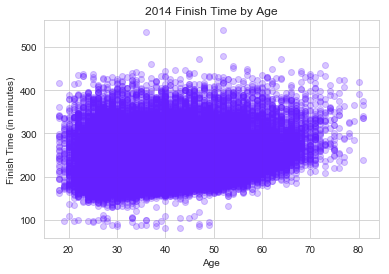

In [21]:
plt.scatter(x = results['age'], y = results['official'], alpha=.25)
plt.title('2014 Finish Time by Age') 
plt.xlabel('Age')
plt.ylabel('Finish Time (in minutes)');

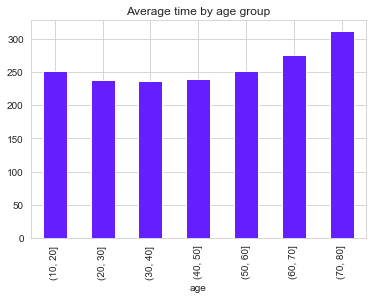

In [22]:
results['official'].groupby(pd.cut(results['age'], range(10,90,10))).aggregate(np.average).plot(kind="bar", title="Average time by age group")
plt.show()

In [23]:
results.age.max()

81

In [24]:
results['age-bracket'] = pd.cut(results['age'], range(0,100,20))
results['age-bracket'] = results['age-bracket'].astype('category')
results['age-bracket_code'] = results['age-bracket'].cat.codes

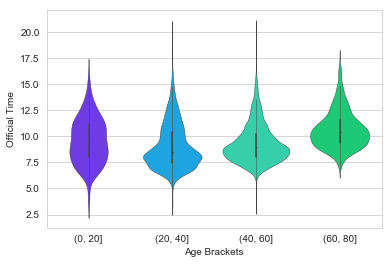

In [25]:
sns.violinplot(x='age-bracket', y='pace', data=results, linewidth=.5)
plt.xlabel('Age Brackets')
plt.ylabel('Official Time')
plt.show()

In [26]:
results['age-bracket'].value_counts()

(40, 60]    15657
(20, 40]    13691
(60, 80]     1896
(0, 20]       185
Name: age-bracket, dtype: int64

___

In [27]:
results.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,...,city,40k,country-code,region,sub-region,region-code,sub-region-code,gender_code,age-bracket,age-bracket_code
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,...,Fukuoka,80.43,392,Asia,Eastern Asia,142.0,30.0,1,"(40, 60]",2
1,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,...,Nogata Fukuoka,76.72,392,Asia,Eastern Asia,142.0,30.0,1,"(20, 40]",1
2,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,67.83,...,Isahaya,76.70,392,Asia,Eastern Asia,142.0,30.0,1,"(40, 60]",2
3,35.20,"Higuchi, Noriko",21,88.73,F,28,153.65,F22,21,126.48,...,Kyoto,145.47,392,Asia,Eastern Asia,142.0,30.0,0,"(20, 40]",1
4,30.83,"Sakai, Koichi",14,78.02,M,28,134.93,26,14,111.12,...,Chiba,127.67,392,Asia,Eastern Asia,142.0,30.0,1,"(20, 40]",1


In [28]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31435 entries, 0 to 31434
Data columns (total 28 columns):
10k                 31386 non-null float64
name                31435 non-null object
division            31435 non-null int64
25k                 31221 non-null float64
gender              31435 non-null category
age                 31435 non-null int64
official            31435 non-null float64
bib                 31435 non-null object
genderdiv           31435 non-null int64
35k                 31402 non-null float64
overall             31435 non-null int64
pace                31435 non-null float64
state               31435 non-null object
30k                 31396 non-null float64
5k                  31383 non-null float64
half                31364 non-null float64
20k                 31384 non-null float64
country             31435 non-null object
city                31434 non-null object
40k                 31397 non-null float64
country-code        31435 non-null int64
re

In [29]:
results['state'].value_counts()

MA       7587
CA       2326
inter    2027
NY       1553
ON       1052
PA       1001
TX        992
IL        916
OH        760
FL        750
VA        713
MI        695
NC        618
WA        596
CO        578
NJ        569
MN        556
MD        527
NH        526
CT        521
GA        443
WI        433
UT        431
QC        419
OR        406
AZ        318
IN        291
TN        261
MO        256
ME        250
         ... 
ID        124
NE        111
NS        109
AL        105
OK         92
NV         88
LA         78
NM         71
MT         65
DE         63
WV         56
NB         55
AK         50
HI         49
AR         48
MB         47
MS         46
SD         32
SK         32
ND         31
PE         23
WY         22
NL         18
PR         17
AE          7
YT          5
NT          3
GU          1
AP          1
AA          1
Name: state, Length: 69, dtype: int64

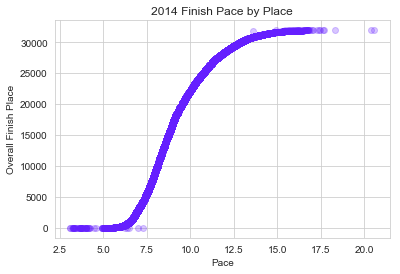

In [30]:
plt.scatter(x = results['pace'], y = results['overall'], alpha=.25)
plt.title('2014 Finish Pace by Place') 
plt.xlabel('Pace')
plt.ylabel('Overall Finish Place');

Those dots at the far left of the graph are the wheelchair finishers. Because their pace is off and generally unrealistic for a runner to achieve I'll go ahead and drop them.

In [31]:
results = results.drop(results[results['bib'].str.contains('W')].index)

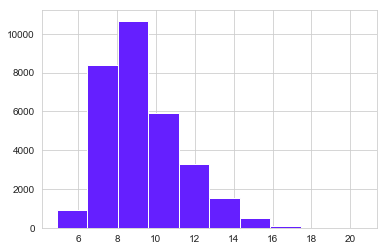

In [32]:
plt.hist(results.pace)
plt.show()

In [33]:
results.pace.describe()

count    31385.000000
mean         9.287511
std          1.984657
min          4.920000
25%          7.850000
50%          8.870000
75%         10.430000
max         20.570000
Name: pace, dtype: float64

In [34]:
results['pace-bracket'] = results['pace'].round()

results['pace-bracket'].value_counts()

8.0     7623
9.0     6390
7.0     4445
10.0    4325
11.0    3095
12.0    2002
13.0    1367
6.0      926
14.0     666
15.0     345
16.0     133
5.0       44
17.0      19
18.0       3
21.0       1
20.0       1
Name: pace-bracket, dtype: int64

In [35]:
results = results.drop(results[results['pace-bracket']>=17].index)

In [36]:
results['pace-bracket'] = results['pace'].round()

results['pace-bracket'].value_counts()

8.0     7623
9.0     6390
7.0     4445
10.0    4325
11.0    3095
12.0    2002
13.0    1367
6.0      926
14.0     666
15.0     345
16.0     133
5.0       44
Name: pace-bracket, dtype: int64

In [37]:
results.pace.mean()

9.281403016485442

In [38]:
results.pace.std()

1.9728739676411815

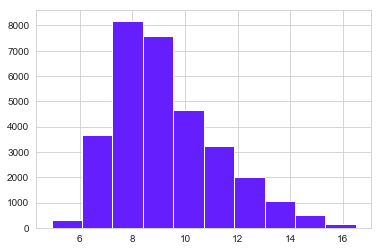

In [39]:
plt.hist(results.pace)
plt.show()

----

## Modeling

In [40]:
results._get_numeric_data().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31361 entries, 3 to 31434
Data columns (total 20 columns):
10k                 31312 non-null float64
division            31361 non-null int64
25k                 31158 non-null float64
age                 31361 non-null int64
official            31361 non-null float64
genderdiv           31361 non-null int64
35k                 31329 non-null float64
overall             31361 non-null int64
pace                31361 non-null float64
30k                 31324 non-null float64
5k                  31309 non-null float64
half                31290 non-null float64
20k                 31311 non-null float64
40k                 31329 non-null float64
country-code        31361 non-null int64
region-code         31361 non-null float64
sub-region-code     31361 non-null float64
gender_code         31361 non-null int8
age-bracket_code    31361 non-null int8
pace-bracket        31361 non-null float64
dtypes: float64(13), int64(5), int8(2)
memory u

In [47]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Make sure the number of rows divides evenly into four samples.
#rows = df.shape[0] - df.shape[0] % 4
#resu = df.iloc[:rows, :]

results = results.dropna()

res_num = results._get_numeric_data()

# Break into a set of features and a variable for the known outcome.
X = res_num.drop('gender_code', axis=1)
y = results['gender']

# Normalize
X_norm = normalize(X)

# Two PCA Features
X_pca = PCA(2).fit_transform(X_norm)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

from sklearn.model_selection import train_test_split

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.5)

In [57]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

### K Means

In [48]:
from sklearn.cluster import KMeans

# Calculate predicted values.
km = KMeans(n_clusters=2).fit(X_train)
y_train_pred = km.predict(X_test)

# Check the solution against the data.
print('\nComparing k-means clusters against the training set data:')
print(pd.crosstab(y_test, y_train_pred))


Comparing k-means clusters against the training set data:
col_0      0     1
gender            
F       7032    25
M       5346  3115


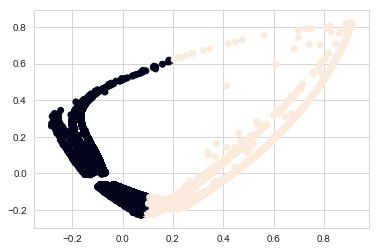

In [49]:
# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_train_pred)
plt.show()

### Mini Batch K Means

In [80]:
from sklearn.cluster import MiniBatchKMeans

# Each batch will be made up of 200 data points.
mini = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=600)
mini.fit(X_train)
y_test_pred = mini.predict(X_test)

# Check the solution against the data.
print('\nComparing k-means clusters against the training set data:')
print(pd.crosstab(y_test, y_test_pred))


Comparing k-means clusters against the training set data:
col_0      0     1
gender            
F       7038    19
M       4245  4216


In [76]:
from sklearn import metrics
n_clusters = (2,4,6,10,20,30)
for n in n_clusters:
    print("Number of estimated clusters: {}".format(n))
    model = MiniBatchKMeans(init='random', n_clusters=n, batch_size=600).fit(X_train)
    labels = model.labels_
    print(metrics.silhouette_score(X_train, labels, metric='euclidean'))

Number of estimated clusters: 2
0.6616660894314251
Number of estimated clusters: 4
0.4848134552286577
Number of estimated clusters: 6
0.5282843111198359
Number of estimated clusters: 10
0.47408436860713987
Number of estimated clusters: 20
0.3946541220916638
Number of estimated clusters: 30
0.39314875126421606


In [81]:
print('ARI for  Training set data: ')
print(metrics.adjusted_rand_score(y_train,  y_train_pred))

ARI for  Training set data: 
-0.0011445111412954345


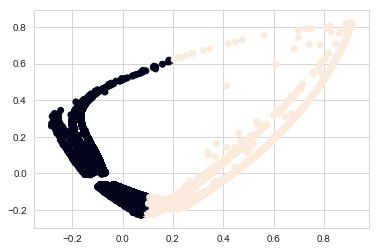

In [82]:
# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_train_pred)
plt.show()

## Mean Shift

In [83]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
print("bandwidth: {}".format(bandwidth))

model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model.fit(X_train)

labels = model.labels_
cluster_centers = model.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
print(metrics.silhouette_score(X_train, labels, metric='euclidean'))

bandwidth: 0.12684755244157378
Number of estimated clusters: 8
0.4766311783267415


In [84]:
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Comparing the assigned categories to the ones in the data:
col_0      0    1   2   3    4  5  6  7
gender                                 
F       6690    0   8   0  253  6  5  8
M       7869  534  80  65    0  0  0  0


In [85]:
# Adjusted Rand Score
metrics.adjusted_rand_score(y_train, labels)

-0.0037557882983336745

### Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

# We know we're looking for two clusters.
n_clusters=2

start_time = time.clock()
# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
train_predict=sc.fit_predict(X_train)



print('Runtime for Spectral Cluster: '+'%s seconds'% (time.clock() - start_time))

print('\nComparing the assigned categories to the ones in the Training set data:')
print(pd.crosstab(y_train,train_predict))

This was taking forever to run, so skipping for now.

### Affinnity Propagaton

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation(damping=.75, affinity='euclidean').fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

start_time = time.clock()
#Predicted clusters.
predict=af.fit_predict(X_train)

print('Runtime for Affinity propagation: '+'%s seconds'% (time.clock() - start_time))

print('Estimated number of clusters: {}'.format(n_clusters_))

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Very very random and doesn't tell us much at all

In [91]:
from sklearn.metrics import pairwise_distances

print(metrics.silhouette_score(X_train, labels, metric='euclidean'))

0.3818095410380991


In [90]:
print('ARI for  Training set data: ')
print(metrics.adjusted_rand_score(y_train,  predict))

ARI for  Training set data: 
0.023421073207129443
